In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from itertools import cycle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from collections import defaultdict
from sklearn.preprocessing import label_binarize, StandardScaler, scale
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from scipy import stats

In [126]:
df = pd.read_csv("VLagun_Total_Years_depth.csv")
df.shape

(155, 57)

In [127]:
df = df.iloc[:,0:df.shape[1]]
test_size=.3
dftrain,dftest=train_test_split(df,test_size=test_size)

In [128]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 68 to 16
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   PSU                                     108 non-null    float64
 1   O2                                      108 non-null    float64
 2   temp.                                   108 non-null    float64
 3   SS                                      108 non-null    float64
 4   SRP                                     108 non-null    float64
 5   DOP                                     108 non-null    float64
 6   PP                                      108 non-null    float64
 7   NH4N                                    108 non-null    float64
 8   NO3N                                    108 non-null    float64
 9   DON                                     108 non-null    float64
 10  PN                                      108 non-null    float6

In [129]:
dftrain.describe()

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Polyarthra vulgaris,Polyarthra platyptera,Pompholyx sp.,Synchaeta sp.,Trichocerca pusilla,Trichocerca similis,Depth
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,3.290796,10.214074,17.060185,87.887315,15.532407,21.233333,134.352778,0.029102,0.037537,0.568093,...,0.276509,0.037241,0.019083,0.015491,0.023778,0.001056,0.001556,0.000806,0.000704,3.004630
std,0.761137,1.102386,3.323070,37.544909,12.768959,18.964453,51.175440,0.017064,0.021471,0.172267,...,0.762878,0.132120,0.083200,0.057160,0.108606,0.003798,0.007425,0.002318,0.002551,0.573949
min,1.400000,7.620000,10.600000,29.000000,1.300000,0.800000,36.400000,0.002000,0.009000,0.022000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000
25%,2.777500,9.450000,16.075000,60.000000,7.725000,8.175000,99.950000,0.018000,0.024000,0.482500,...,0.001000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000
50%,3.300000,10.010000,17.550000,81.900000,12.650000,15.050000,128.600000,0.026000,0.032000,0.570500,...,0.013000,0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,3.852500,10.837500,20.100000,111.562500,20.425000,29.175000,167.875000,0.034250,0.044250,0.694250,...,0.074750,0.011500,0.002250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000
max,4.600000,12.850000,20.700000,217.500000,88.200000,83.600000,285.100000,0.104000,0.142000,0.961000,...,5.311000,1.265000,0.804000,0.474000,0.887000,0.025000,0.050000,0.013000,0.019000,4.000000


<Axes: >

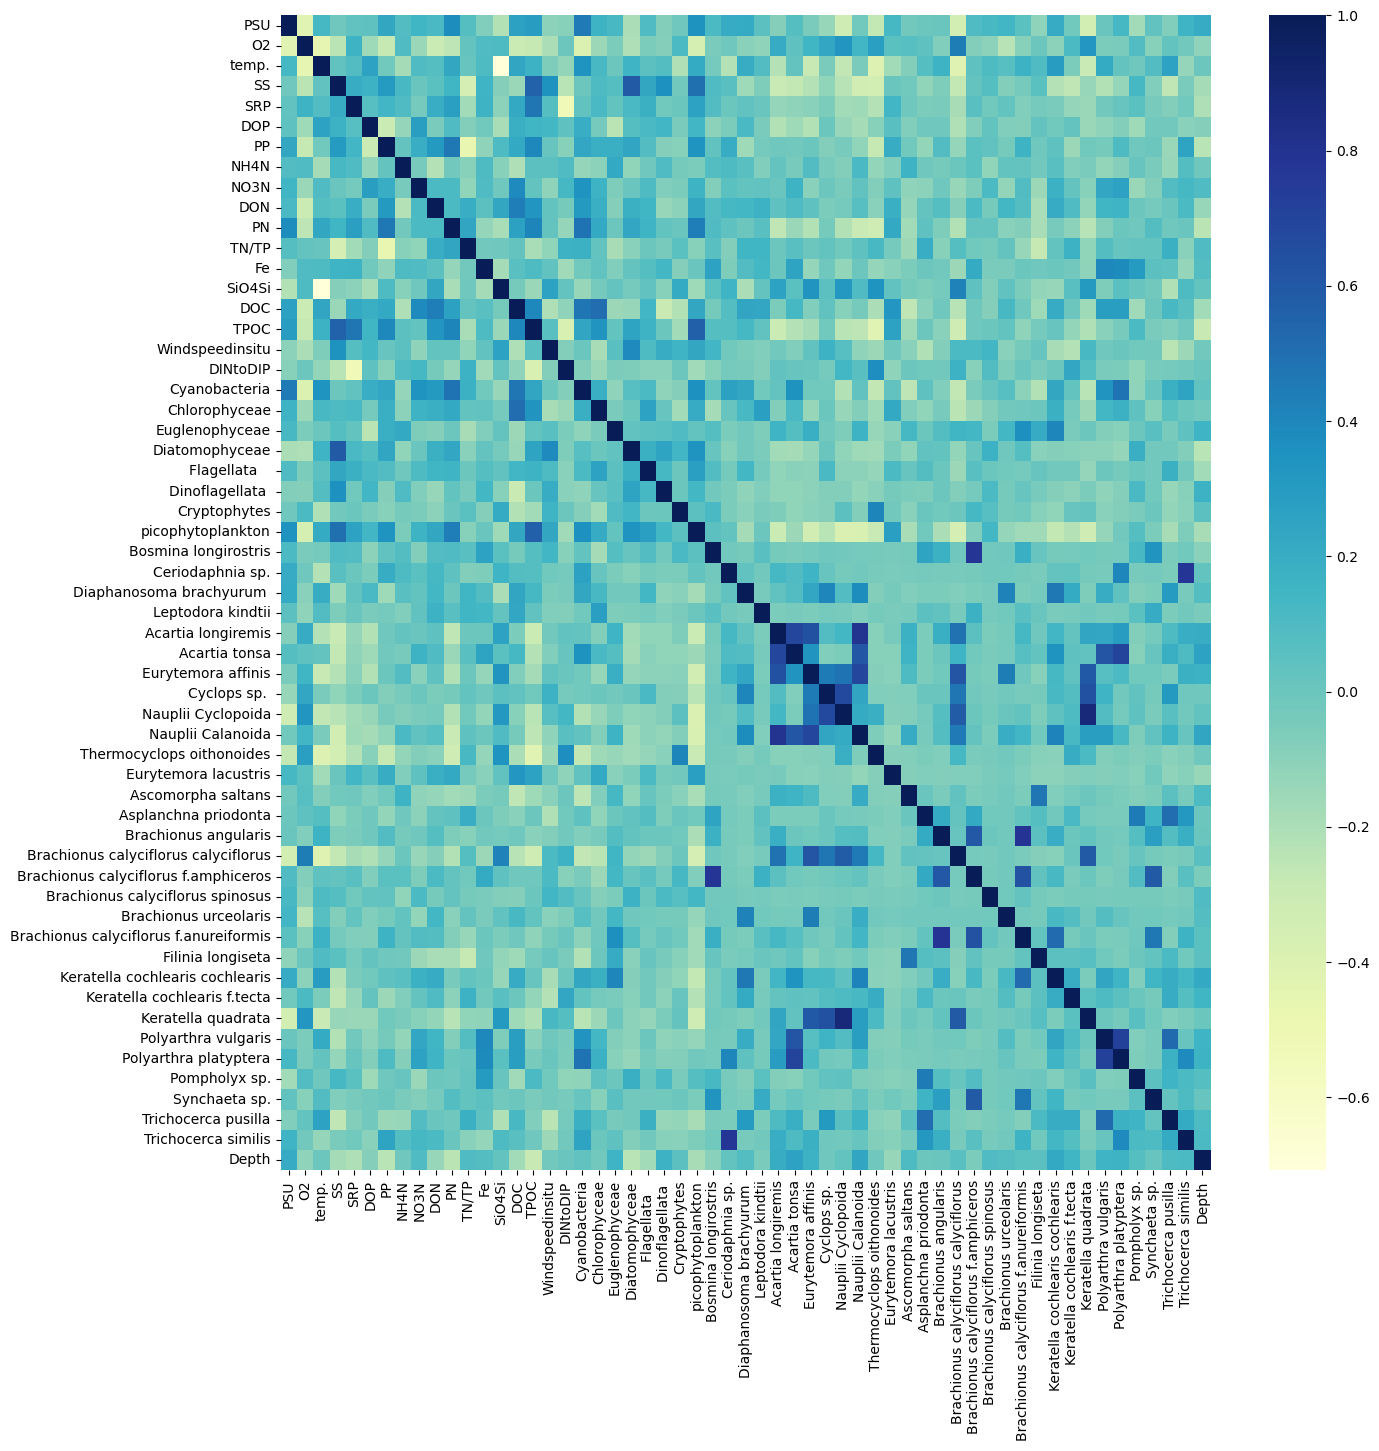

In [130]:
plt.figure(figsize=(15,15))
sns.heatmap(dftrain.corr(),fmt=".2f",cmap="YlGnBu")

In [131]:
dftrain.columns

Index(['PSU', 'O2', 'temp.', 'SS', 'SRP', 'DOP', 'PP', 'NH4N', 'NO3N', 'DON',
       'PN', 'TN/TP', 'Fe', 'SiO4Si', 'DOC', 'TPOC', 'Windspeedinsitu',
       'DINtoDIP', 'Cyanobacteria', 'Chlorophyceae', 'Euglenophyceae',
       'Diatomophyceae', 'Flagellata   ', 'Dinoflagellata ', 'Cryptophytes',
       'picophytoplankton', 'Bosmina longirostris', 'Ceriodaphnia sp.',
       'Diaphanosoma brachyurum ', 'Leptodora kindtii', 'Acartia longiremis',
       'Acartia tonsa', 'Eurytemora affinis', 'Cyclops sp. ',
       'Nauplii Cyclopoida', 'Nauplii Calanoida', 'Thermocyclops oithonoides',
       'Eurytemora lacustris', 'Ascomorpha saltans', 'Asplanchna priodonta',
       'Brachionus angularis', 'Brachionus calyciflorus calyciflorus',
       'Brachionus calyciflorus f.amphiceros',
       'Brachionus calyciflorus spinosus', 'Brachionus urceolaris',
       'Brachionus calyciflorus f.anureiformis', 'Filinia longiseta',
       'Keratella cochlearis cochlearis', 'Keratella cochlearis f.tecta',
    

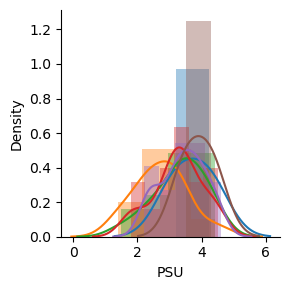

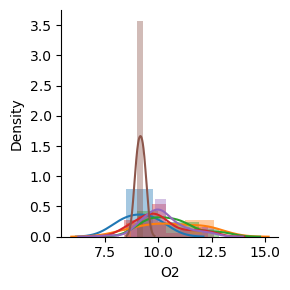

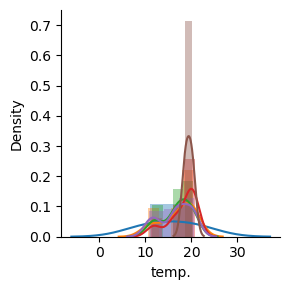

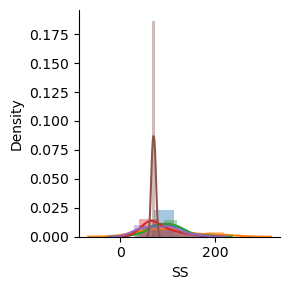

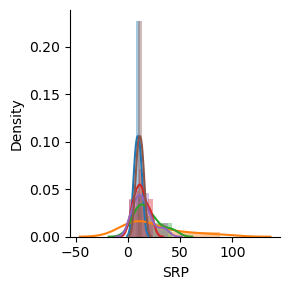

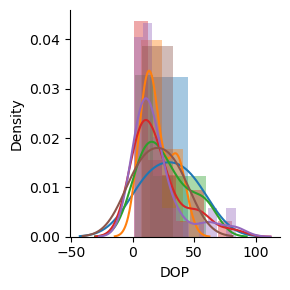

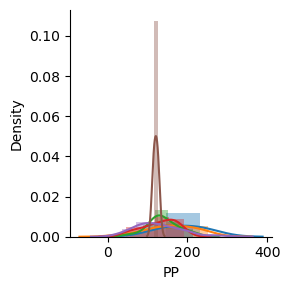

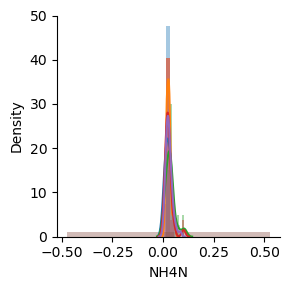

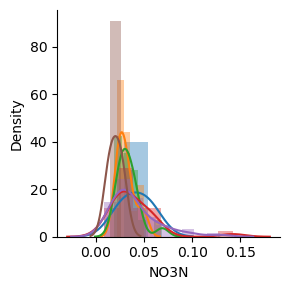

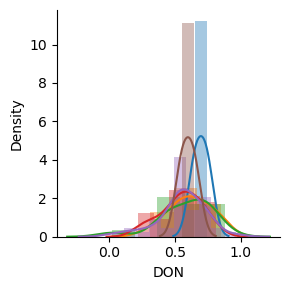

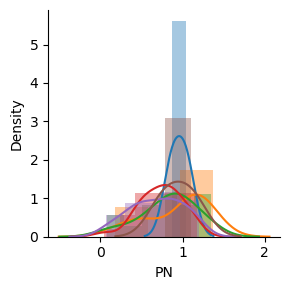

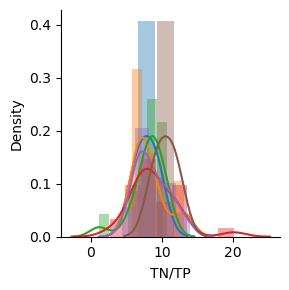

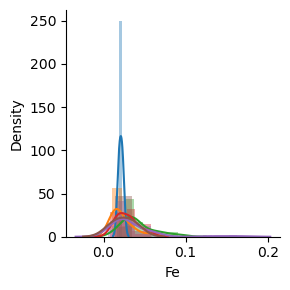

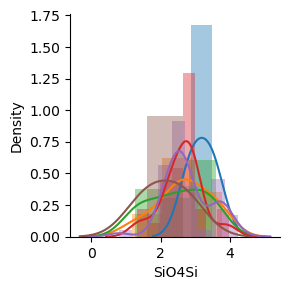

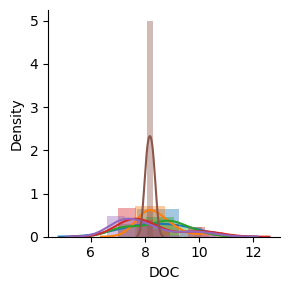

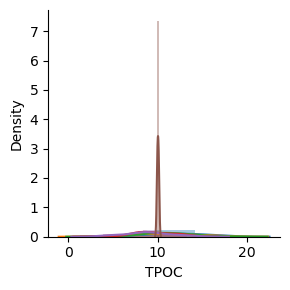

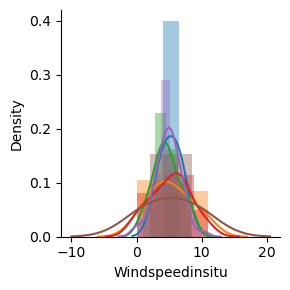

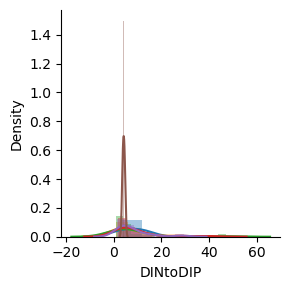

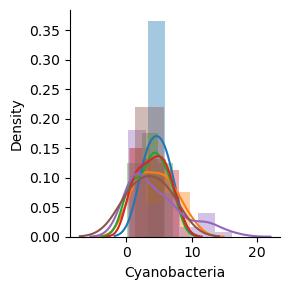

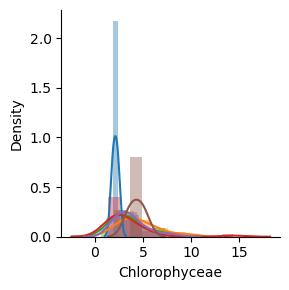

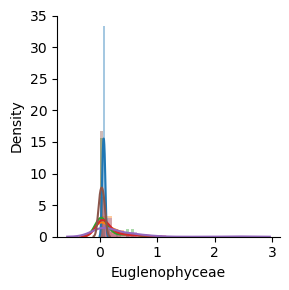

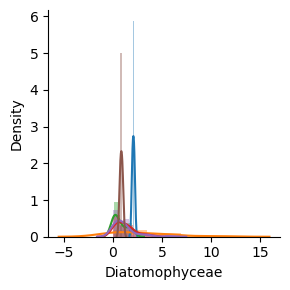

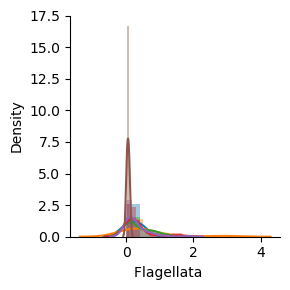

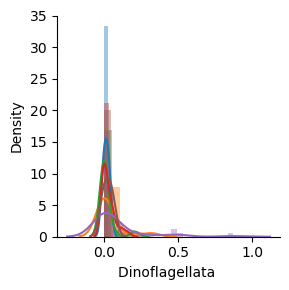

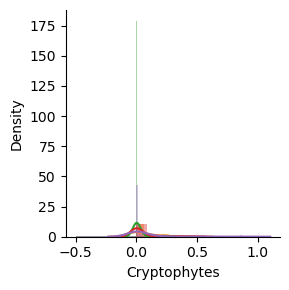

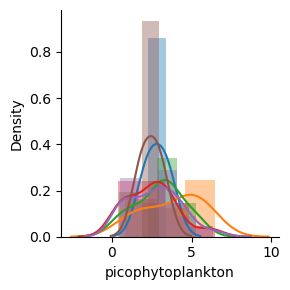

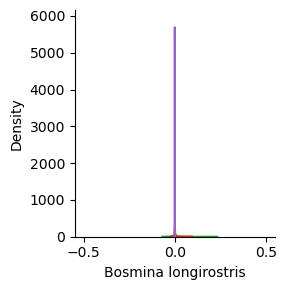

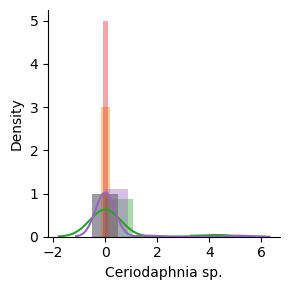

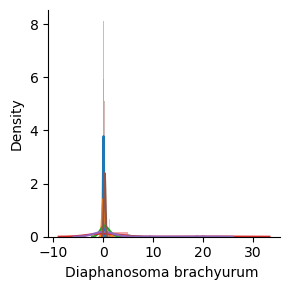

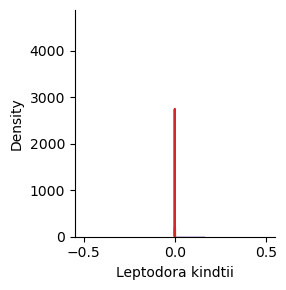

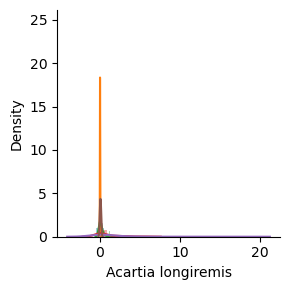

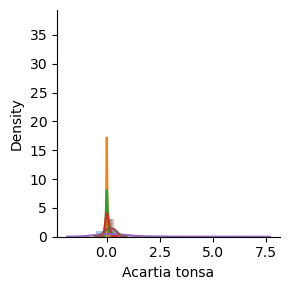

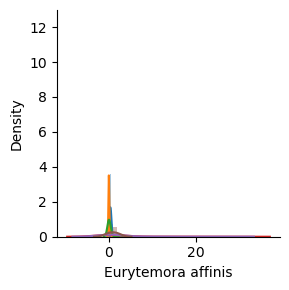

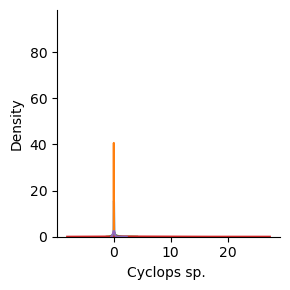

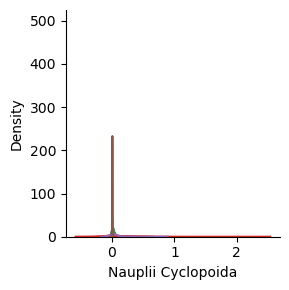

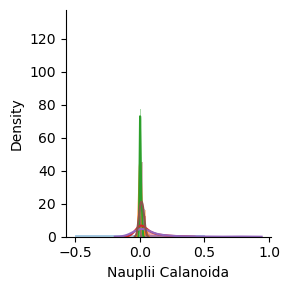

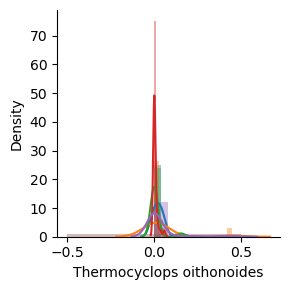

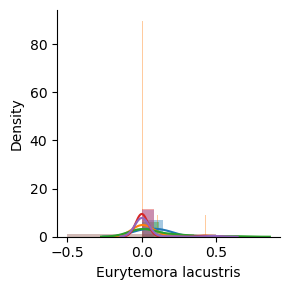

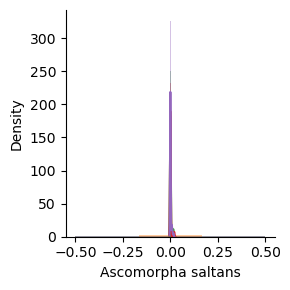

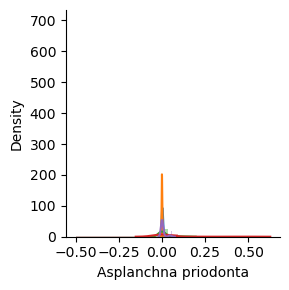

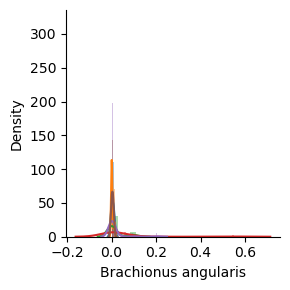

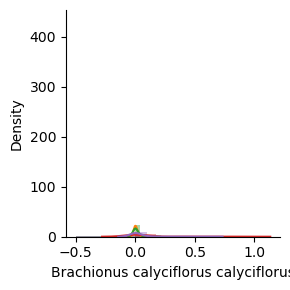

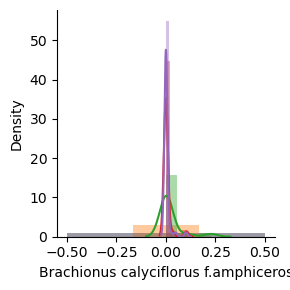

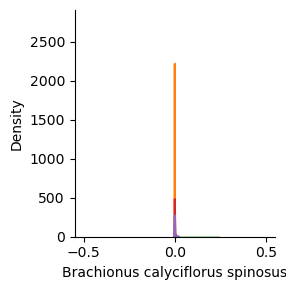

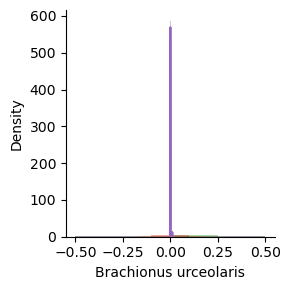

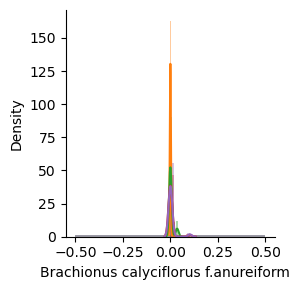

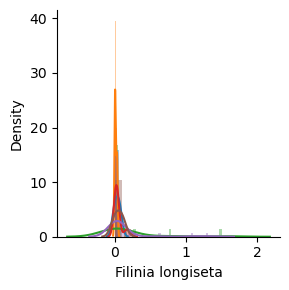

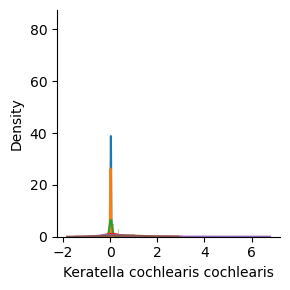

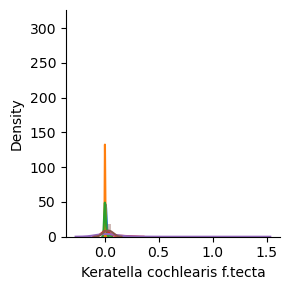

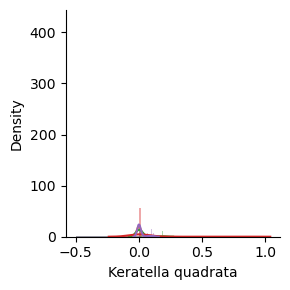

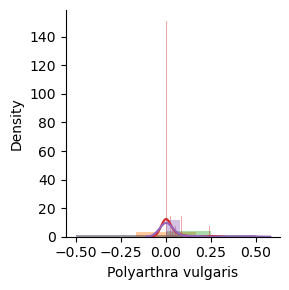

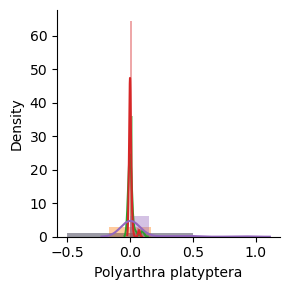

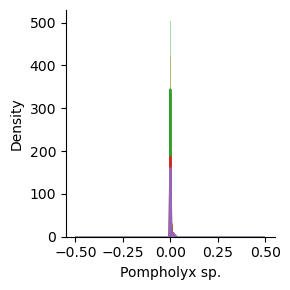

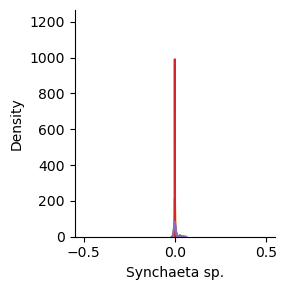

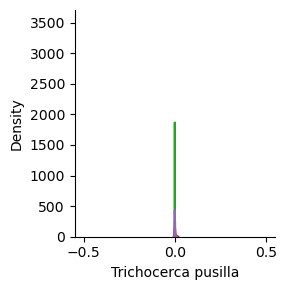

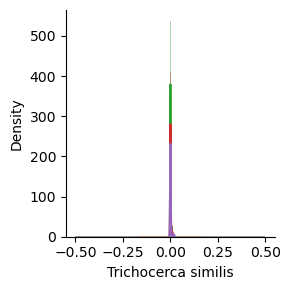

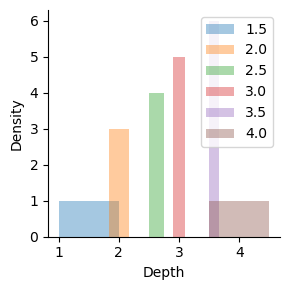

In [132]:
for i in dftrain.columns:
    sns.FacetGrid(dftrain, hue=dftrain.columns[len(dftrain.columns)-1]).map(sns.distplot, i)
plt.legend()

In [133]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [134]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df=dataframe
        self.p=None
        self.chi2=None
        self.dof=None
        
        self.dfObserved=None
        self.dfExpected=None
        self.colImp=[]
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result+=f'{colX} is IMPORTANT for Prediction'
            self.colImp+=[colX]
            
        print(result)
    
    def TestIndependence(self, colX, colY, alpha=.25):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        self.dfObserved = pd.crosstab(Y,X)
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof= dof
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)
    

In [135]:
cT = ChiSquare(dftrain)

In [136]:
for var in dftrain.columns[:len(dftrain.columns)-1]:
    cT.TestIndependence(colX=var, colY=dftrain.columns[len(dftrain.columns)-1])






DOP is IMPORTANT for Prediction

NH4N is IMPORTANT for Prediction

















picophytoplankton is IMPORTANT for Prediction


Diaphanosoma brachyurum  is IMPORTANT for Prediction



Eurytemora affinis is IMPORTANT for Prediction



Thermocyclops oithonoides is IMPORTANT for Prediction
Eurytemora lacustris is IMPORTANT for Prediction









Keratella cochlearis cochlearis is IMPORTANT for Prediction










In [137]:
import itertools

outlier_list=[]

for i in cT.colImp:
    q1=np.percentile(dftrain.loc[:,i],25)
    q3=np.percentile(dftrain.loc[:,i],75)
    step=1.5*(q3-q1)
    print(f"Data points considered outliers for the feature {i}")
    
    outliers_rows = dftrain.loc[~((dftrain[i]>=q1 - step)& (dftrain[i]<=q3+step)), :]
    outlier_list.append(list(outliers_rows.index))
    outliers = list(itertools.chain.from_iterable(outlier_list))

uniq_outlier = list(set(outliers))

dup_outliers = list(set([x for x in outliers if outliers.count(x)>1]))
print("Outliers list: \n",uniq_outlier)
print('Length of outliers list: \n', len(uniq_outlier))

print("Duplicate list: \n",dup_outliers)
print('Length of duplicates list: \n', len(dup_outliers))

real_data=dftrain.drop(dftrain.index[dup_outliers]).reset_index(drop=True)

print(real_data.shape)

Data points considered outliers for the feature DOP
Data points considered outliers for the feature NH4N
Data points considered outliers for the feature picophytoplankton
Data points considered outliers for the feature Diaphanosoma brachyurum 
Data points considered outliers for the feature Eurytemora affinis
Data points considered outliers for the feature Thermocyclops oithonoides
Data points considered outliers for the feature Eurytemora lacustris
Data points considered outliers for the feature Keratella cochlearis cochlearis
Outliers list: 
 [0, 4, 8, 10, 139, 12, 11, 140, 141, 16, 146, 18, 20, 148, 150, 23, 147, 26, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 54, 55, 63, 66, 67, 68, 74, 75, 77, 79, 80, 81, 82, 91, 94, 96, 98, 102, 103, 105, 106, 107, 108, 109, 112, 113, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 126]
Length of outliers list: 
 73
Duplicate list: 
 [10, 139, 16, 18, 20, 26, 28, 29, 30, 35, 36, 66, 74, 96, 102, 103, 105, 106, 107, 1

IndexError: index 139 is out of bounds for axis 0 with size 108